# Unit 12 - Tales from the Crypto

---


## 1. Sentiment Analysis

Use the [newsapi](https://newsapi.org/) to pull the latest news articles for Bitcoin and Ethereum and create a DataFrame of sentiment scores for each coin.

Use descriptive statistics to answer the following questions:
1. Which coin had the highest mean positive score?
2. Which coin had the highest negative score?
3. Which coin had the highest positive score?

In [1]:
# Initial imports
import os
import pandas as pd
from dotenv import load_dotenv
import nltk as nltk
nltk.download('vader_lexicon')
from nltk.sentiment.vader import SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()
import json
from pandas.io.json import json_normalize

%matplotlib inline

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\akkrishn\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


In [2]:
# Read your api key environment variable
from newsapi import NewsApiClient
load_dotenv()
api_key = os.getenv("NEWSAPI_KEY")

In [3]:
# Create a newsapi client
newsapi = NewsApiClient(api_key=api_key)

In [4]:
# Fetch the Bitcoin news articles
btc_headlines = newsapi.get_everything(q='bitcoin',
                                        language="en",
                                        page_size=100,
                                        sort_by='relevancy')
#save json
with open('btc.json', 'w') as json_file:
   json.dump(btc_headlines, json_file)

In [105]:
help(newsapi.get_everything)

Help on method get_everything in module newsapi.newsapi_client:

get_everything(q=None, sources=None, domains=None, exclude_domains=None, from_param=None, to=None, language=None, sort_by=None, page=None, page_size=None) method of newsapi.newsapi_client.NewsApiClient instance
        Search through millions of articles from over 5,000 large and small news sources and blogs.
    
        Optional parameters:
            (str) q - return headlines w/ specified coin! Valid values are:
                        'bitcoin', 'trump', 'tesla', 'ethereum', etc
    
            (str) sources - return headlines of news sources! some Valid values are:
                        'bbc-news', 'the-verge', 'abc-news', 'crypto coins news',
                        'ary news','associated press','wired','aftenposten','australian financial review','axios',
                        'bbc news','bild','blasting news','bloomberg','business insider','engadget','google news',
                        'hacker news','info

In [5]:
# Fetch the Ethereum news articles
eth_headlines = newsapi.get_everything(q='ethereum',
                                        language="en",
                                        page_size=100,
                                        sort_by="relevancy")
#save json
with open('eth.json', 'w') as json_file:
    json.dump(eth_headlines, json_file)

In [6]:
# Create the Bitcoin sentiment scores DataFrame
tc = pd.read_json ('Data/btc.json')
#parse the json and load into a dataframe
btc_df = json_normalize(btc_headlines['articles'])
#drop all columns except for description
btc_df = btc_df.drop(['author', 'title', 'url','urlToImage','publishedAt','content','source.id','source.name'], axis=1)
#instantiate vader sentiment 
sentiment_title = btc_df.apply(lambda x : analyzer.polarity_scores(x['description']), axis=1)
#add a column for each sentimement metric
btc_df['Comp'] =sentiment_title.apply(lambda x : x.get('compound') )
btc_df['Pos'] =sentiment_title.apply(lambda x : x.get('pos') )
btc_df['Neu'] =sentiment_title.apply(lambda x : x.get('neu') )
btc_df['Neg'] =sentiment_title.apply(lambda x : x.get('neg') )
btc_df

<ipython-input-6-ad5365a58471>:4: FutureWarning: pandas.io.json.json_normalize is deprecated, use pandas.json_normalize instead
  btc_df = json_normalize(btc_headlines['articles'])


description    Comp    Pos    Neu  \
0   It's all about clean energy, it seems. \nElon ...  0.8074  0.189  0.811   
1   Three days after ransomware attackers hijacked... -0.7845  0.000  0.823   
2   The authors of a "colossal" ransomware attack ... -0.5574  0.000  0.787   
3   El Salvador will not replace the U.S. dollar w...  0.1280  0.040  0.960   
4   El Salvador is determined to push ahead with m...  0.2023  0.098  0.850   
..                                                ...     ...    ...    ...   
95  More people see crypto assets as a mainstream ...  0.2500  0.081  0.919   
96  A top U.S. diplomat said on Wednesday that she...  0.7964  0.252  0.748   
97  The International Monetary Fund said on Thursd...  0.2960  0.094  0.906   
98  China's sweeping ban on cryptocurrency mining ... -0.8176  0.000  0.790   
99  Bitcoin  regained some ground on Tuesday, a da... -0.5719  0.000  0.836   

      Neg  
0   0.000  
1   0.177  
2   0.213  
3   0.000  
4   0.053  
..    ...  
95  0.000  
96  0.000  
97  0.000  
98  0.210  
99  0.164  

[100 rows x 5 columns]

In [7]:
# Create the Ethereum sentiment scores DataFrame
#read in the json file
eth = pd.read_json ('Data/eth.json')
#parse the json and load into a dataframe
eth_df = json_normalize(eth_headlines['articles'])
#drop all columns except for description
eth_df = eth_df.drop(['author', 'title', 'url','urlToImage','publishedAt','content','source.id','source.name'], axis=1)
#instantiate vader sentiment 
sentiment_title = eth_df.apply(lambda x : analyzer.polarity_scores(x['description']), axis=1)
#add a column for each sentimement metric
eth_df['Comp'] =sentiment_title.apply(lambda x : x.get('compound') )
eth_df['Pos'] =sentiment_title.apply(lambda x : x.get('pos') )
eth_df['Neu'] =sentiment_title.apply(lambda x : x.get('neu') )
eth_df['Neg'] =sentiment_title.apply(lambda x : x.get('neg') )
eth_df

<ipython-input-7-dfc6d4dec623>:5: FutureWarning: pandas.io.json.json_normalize is deprecated, use pandas.json_normalize instead
  eth_df = json_normalize(eth_headlines['articles'])


description    Comp    Pos    Neu  \
0   TL;DR: The Cryptocurrency with Ethereum and So...  0.0000  0.000  1.000   
1   It wasn't long ago that your average person ha... -0.2960  0.000  0.950   
2   Ethereum overtook bitcoin in the number of act...  0.3612  0.186  0.744   
3   Users are putting forward "stakes" of ether to...  0.7096  0.219  0.781   
4   Users are putting forward "stakes" of ether to...  0.7096  0.219  0.781   
..                                                ...     ...    ...    ...   
95  The dollar paused for breath on Tuesday as tra... -0.1531  0.056  0.873   
96  Summary List PlacementNon-fungible tokens have... -0.0258  0.000  0.973   
97  U.S. cryptocurrency businesses are riding out ...  0.1901  0.041  0.959   
98  There's finally a timetable on a proposal to i...  0.4404  0.293  0.707   
99  Bitcoin and Ethereum both have their advantage... -0.0516  0.205  0.574   

      Neg  
0   0.000  
1   0.050  
2   0.070  
3   0.000  
4   0.000  
..    ...  
95  0.071  
96  0.027  
97  0.000  
98  0.000  
99  0.221  

[100 rows x 5 columns]

In [8]:
# Describe the Bitcoin Sentiment
btc_df.describe()

Comp         Pos         Neu         Neg
count  100.000000  100.000000  100.000000  100.000000
mean     0.003627    0.059060    0.881080    0.059900
std      0.421159    0.074492    0.089655    0.078565
min     -0.865800    0.000000    0.648000    0.000000
25%     -0.366350    0.000000    0.832000    0.000000
50%      0.000000    0.040000    0.886500    0.000000
75%      0.340000    0.091750    0.941250    0.118000
max      0.827100    0.352000    1.000000    0.341000

In [9]:
# Describe the Ethereum Sentiment
eth_df.describe()

Comp         Pos        Neu         Neg
count  100.000000  100.000000  100.00000  100.000000
mean     0.122955    0.070620    0.88973    0.039680
std      0.354384    0.085144    0.10025    0.061283
min     -0.812600    0.000000    0.54200    0.000000
25%     -0.006450    0.000000    0.82850    0.000000
50%      0.000000    0.043000    0.89550    0.000000
75%      0.367600    0.114250    1.00000    0.059500
max      0.860800    0.317000    1.00000    0.221000

### Questions:

Q: Which coin had the highest mean positive score?

A: Etherium had the highest mean positive score

Q: Which coin had the highest compound score?

A: Etherium had the highest positive compound score

Q. Which coin had the highest positive score?

A: Bitcoin had the highest positive max score

---

## 2. Natural Language Processing
---
###   Tokenizer

In this section, you will use NLTK and Python to tokenize the text for each coin. Be sure to:
1. Lowercase each word.
2. Remove Punctuation.
3. Remove Stopwords.

In [10]:
from nltk.tokenize import word_tokenize, sent_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer, PorterStemmer
import string
from string import punctuation
import re

In [11]:
# Instantiate the lemmatizer
lemmatizer = WordNetLemmatizer()

# Create a list of stopwords
print(stopwords.words('english'))

# Expand the default stopwords list if necessary
# YOUR CODE HERE!

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

In [12]:
# Complete the tokenizer function
def tokenizer(text):
    """Tokenizes text."""
    regex = re.compile("[^a-zA-Z ]")
    re_clean = regex.sub('', text)
    # Create a list of the words
    tokens = word_tokenize(re_clean)
    # Convert the words to lowercase
    tokens = [t.lower() for t in tokens]
    # Remove the punctuation
    words = [t.translate(str.maketrans('','',string.punctuation)) for t in tokens]
    # Remove the stop words
    stop_words = set(stopwords.words('english'))
    words = [w for w in words if not w in stop_words]
    # Lemmatize Words into root words
    tokens = ', '.join([lemmatizer.lemmatize(word) for word in words])
    return tokens
    


In [14]:
# Create a new tokens column for Bitcoin
btc_df['tokens'] = btc_df.apply(lambda x : tokenizer(x['description']), axis=1)
btc_df

description    Comp    Pos    Neu  \
0   It's all about clean energy, it seems. \nElon ...  0.8074  0.189  0.811   
1   Three days after ransomware attackers hijacked... -0.7845  0.000  0.823   
2   The authors of a "colossal" ransomware attack ... -0.5574  0.000  0.787   
3   El Salvador will not replace the U.S. dollar w...  0.1280  0.040  0.960   
4   El Salvador is determined to push ahead with m...  0.2023  0.098  0.850   
..                                                ...     ...    ...    ...   
95  More people see crypto assets as a mainstream ...  0.2500  0.081  0.919   
96  A top U.S. diplomat said on Wednesday that she...  0.7964  0.252  0.748   
97  The International Monetary Fund said on Thursd...  0.2960  0.094  0.906   
98  China's sweeping ban on cryptocurrency mining ... -0.8176  0.000  0.790   
99  Bitcoin  regained some ground on Tuesday, a da... -0.5719  0.000  0.836   

      Neg                                             tokens  
0   0.000  clean, energy, seemselon, musk, tesla, caused,...  
1   0.177  three, day, ransomware, attacker, hijacked, ma...  
2   0.213  author, colossal, ransomware, attack, demand, ...  
3   0.000  el, salvador, replace, u, dollar, bitcoin, leg...  
4   0.053  el, salvador, determined, push, ahead, making,...  
..    ...                                                ...  
95  0.000  people, see, crypto, asset, mainstream, invest...  
96  0.000  top, u, diplomat, said, wednesday, hoped, el, ...  
97  0.000  international, monetary, fund, said, thursday,...  
98  0.210  china, sweeping, ban, cryptocurrency, mining, ...  
99  0.164  bitcoin, regained, ground, tuesday, day, touch...  

[100 rows x 6 columns]

In [15]:
# Create a new tokens column for Ethereum
eth_df['tokens'] = eth_df.apply(lambda x : tokenizer(x['description']), axis=1)
eth_df

description    Comp    Pos    Neu  \
0   TL;DR: The Cryptocurrency with Ethereum and So...  0.0000  0.000  1.000   
1   It wasn't long ago that your average person ha... -0.2960  0.000  0.950   
2   Ethereum overtook bitcoin in the number of act...  0.3612  0.186  0.744   
3   Users are putting forward "stakes" of ether to...  0.7096  0.219  0.781   
4   Users are putting forward "stakes" of ether to...  0.7096  0.219  0.781   
..                                                ...     ...    ...    ...   
95  The dollar paused for breath on Tuesday as tra... -0.1531  0.056  0.873   
96  Summary List PlacementNon-fungible tokens have... -0.0258  0.000  0.973   
97  U.S. cryptocurrency businesses are riding out ...  0.1901  0.041  0.959   
98  There's finally a timetable on a proposal to i...  0.4404  0.293  0.707   
99  Bitcoin and Ethereum both have their advantage... -0.0516  0.205  0.574   

      Neg                                             tokens  
0   0.000  tldr, cryptocurrency, ethereum, solidity, bloc...  
1   0.050  wasnt, long, ago, average, person, clue, nft, ...  
2   0.070  ethereum, overtook, bitcoin, number, active, a...  
3   0.000  user, putting, forward, stake, ether, gain, ri...  
4   0.000  user, putting, forward, stake, ether, gain, ri...  
..    ...                                                ...  
95  0.071  dollar, paused, breath, tuesday, trader, looke...  
96  0.027  summary, list, placementnonfungible, token, ta...  
97  0.000  u, cryptocurrency, business, riding, wild, wes...  
98  0.000  there, finally, timetable, proposal, improve, ...  
99  0.221         bitcoin, ethereum, advantage, disadvantage  

[100 rows x 6 columns]

---

### NGrams and Frequency Analysis

In this section you will look at the ngrams and word frequency for each coin. 

1. Use NLTK to produce the n-grams for N = 2. 
2. List the top 10 words for each coin. 

In [16]:
from collections import Counter
from nltk import ngrams
import nltk, re, string, collections
from collections import Counter
from nltk import ngrams
from nltk.collocations import *
from nltk.util import ngrams
from sklearn.feature_extraction.text import CountVectorizer
#import janitor as jn
#import ConfigParser

In [17]:
# Generate the Bitcoin N-grams where N=2
word_vectorizer = CountVectorizer(ngram_range=(2,2), analyzer='word')
#determine counts in the token column
sparse_matrix = word_vectorizer.fit_transform(btc_df['tokens'])
#sum counts
frequencies = sum(sparse_matrix).toarray()[0]
#create dataframe with ngram and count
btc_df_freq_2 = pd.DataFrame(frequencies, index=word_vectorizer.get_feature_names(), columns=['frequency'])
btc_df_freq_2 = btc_df_freq_2.sort_values(by='frequency', ascending=False)
btc_df_freq_2.head(10)

frequency
previous close             15
el salvador                12
legal tender                9
losing previous             9
bitcoin legal               8
digital asset               8
investment product          6
asset manager               6
adding previous             6
bitcoin dropped             6

In [18]:
# Generate the Ethereum N-grams where N=2
word_vectorizer = CountVectorizer(ngram_range=(2,2), analyzer='word')
#determine counts in the token column
sparse_matrix = word_vectorizer.fit_transform(eth_df['tokens'])
#sum counts
frequencies = sum(sparse_matrix).toarray()[0]
#create dataframe with ngram and count
eth_df_freq_2 = pd.DataFrame(frequencies, index=word_vectorizer.get_feature_names(), columns=['frequency'])
eth_df_freq_2 = eth_df_freq_2.sort_values(by='frequency', ascending=False)
eth_df_freq_2.head(10)

frequency
previous close             15
nonfungible token          11
digital asset               9
losing previous             9
investment product          8
manager coinshares          8
product fund                8
asset manager               8
according data              7
fund posted                 7

---

### Word Clouds

In this section, you will generate word clouds for each coin to summarize the news for each coin

In [19]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')
import matplotlib as mpl
mpl.rcParams['figure.figsize'] = [20.0, 10.0]

In [20]:

#join all text in tokens column into 1 string
corpus_btc = btc_df['tokens'].str.cat(sep=', ')
corpus_eth = eth_df['tokens'].str.cat(sep=', ')

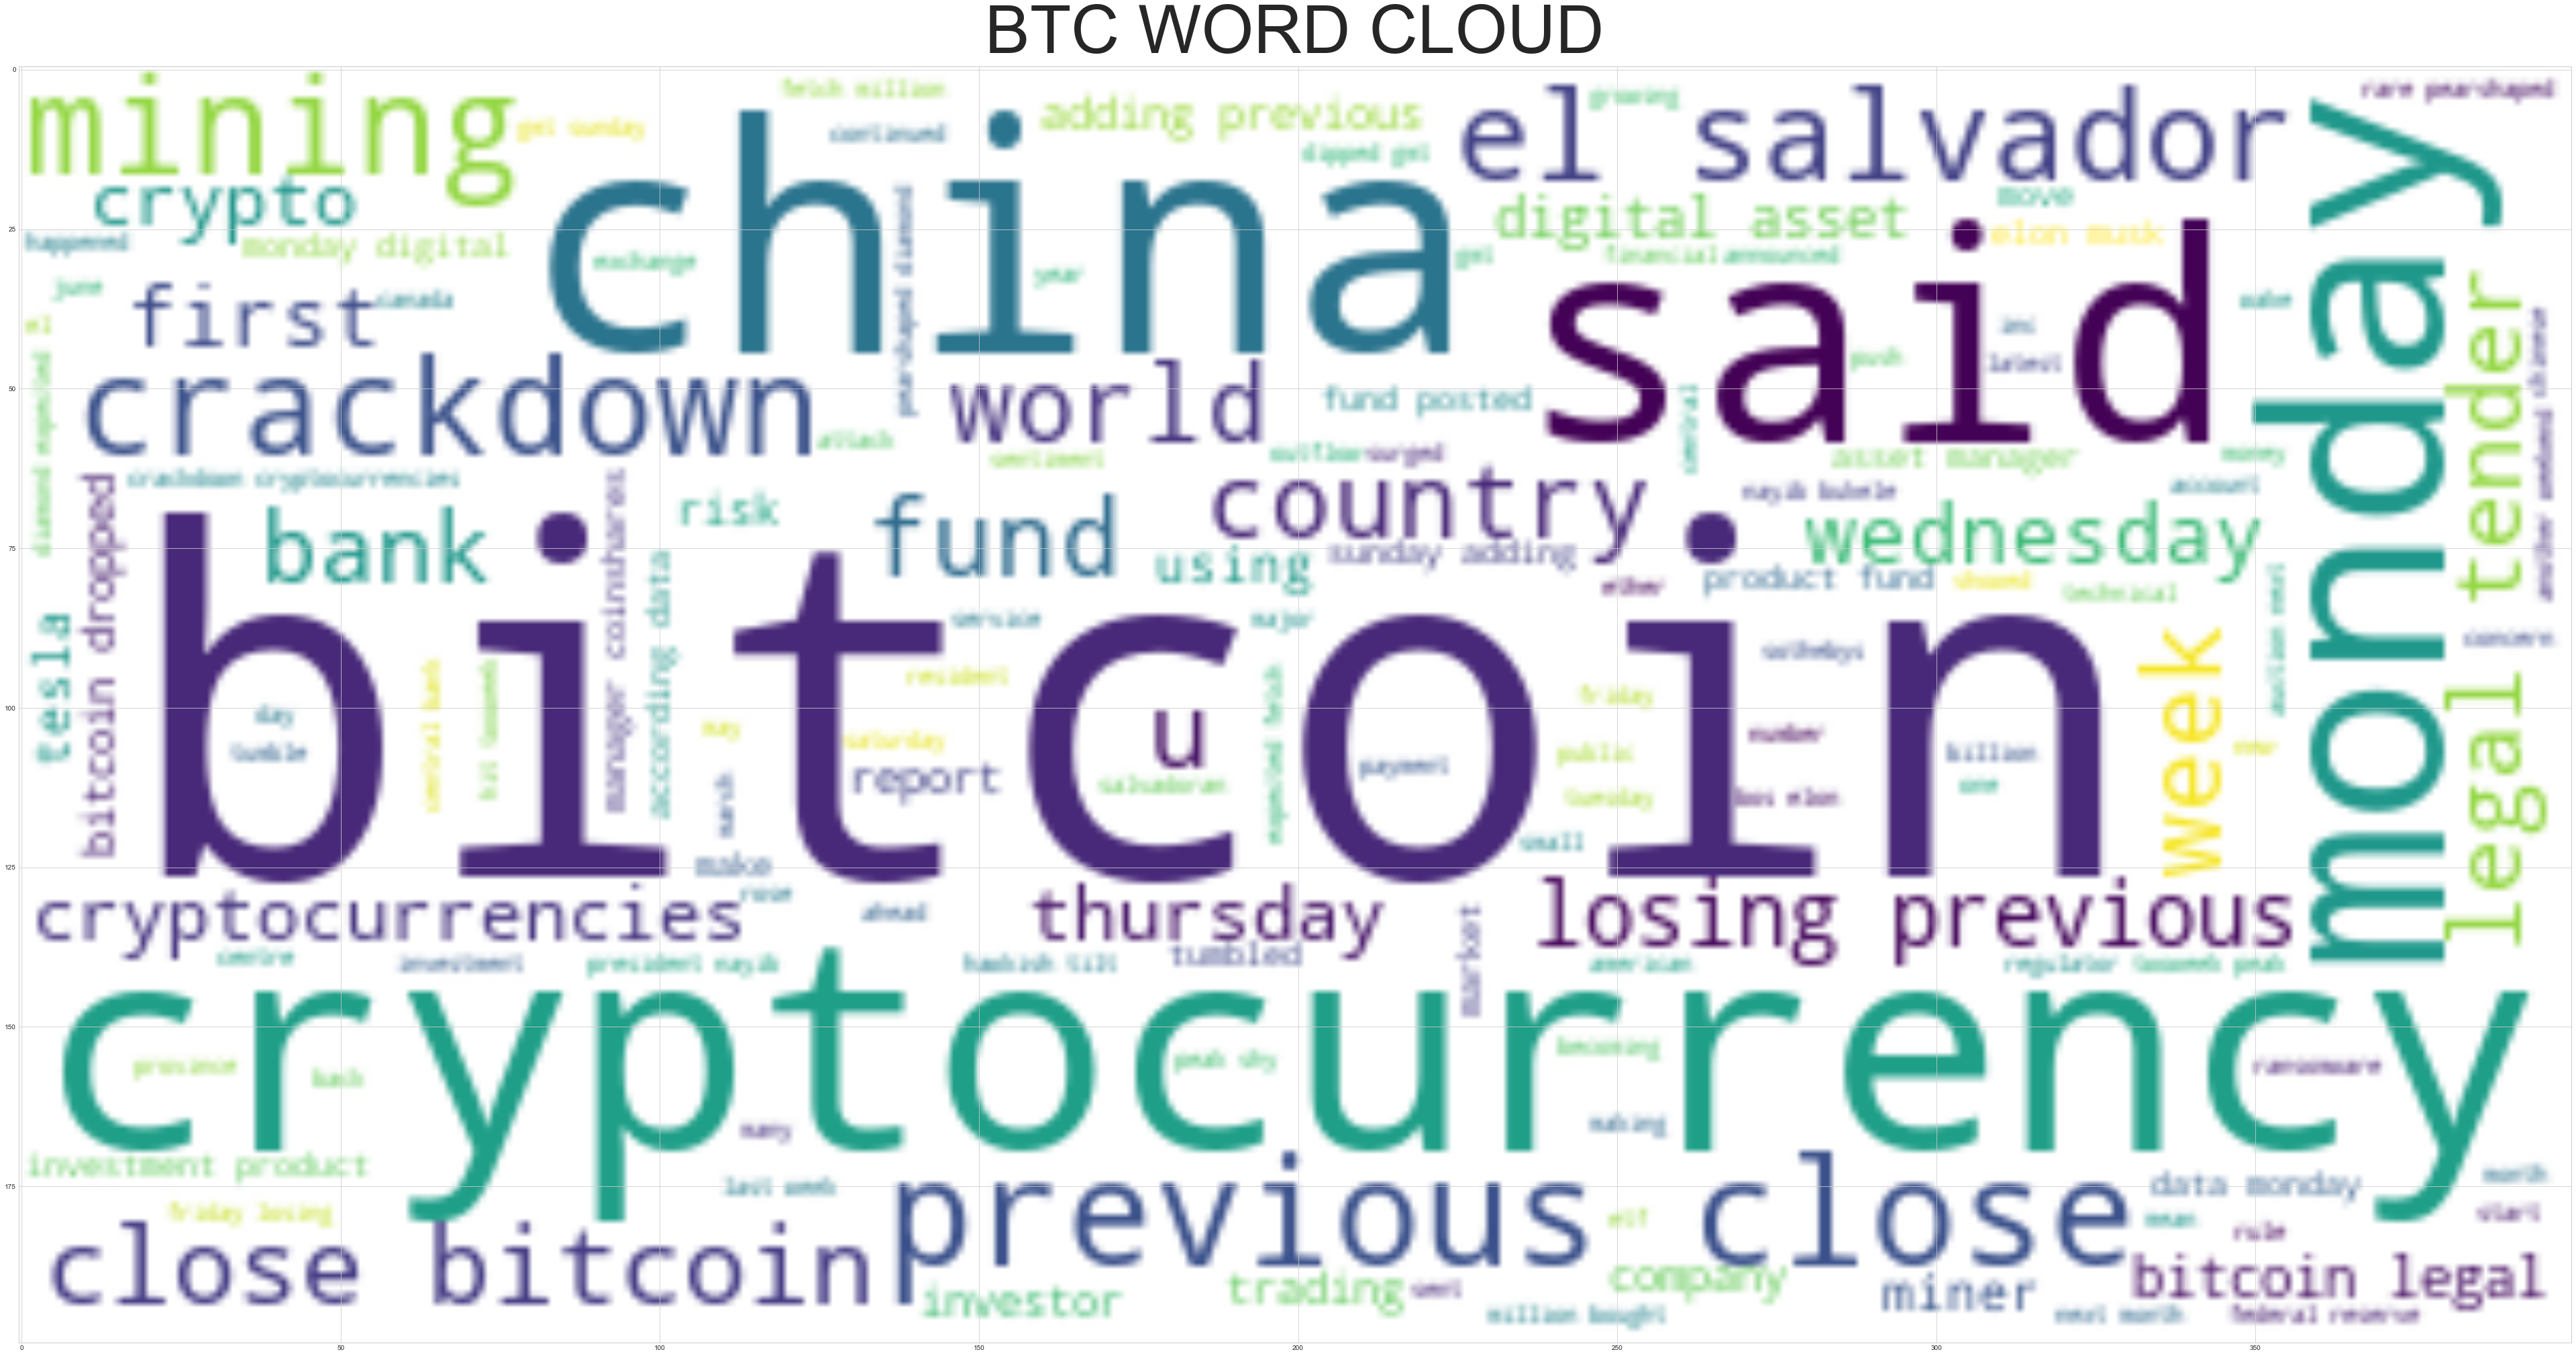

In [21]:
# Generate the Bitcoin word cloud
#create word cloud
wc = WordCloud(background_color="white", max_words=200)
wc.generate(corpus_btc)
f = plt.figure(figsize=(150,150))
f.add_subplot(1,2, 2)
plt.imshow(wc, interpolation='bilinear')
plt.title("BTC WORD CLOUD",fontsize=100)
plt.show()

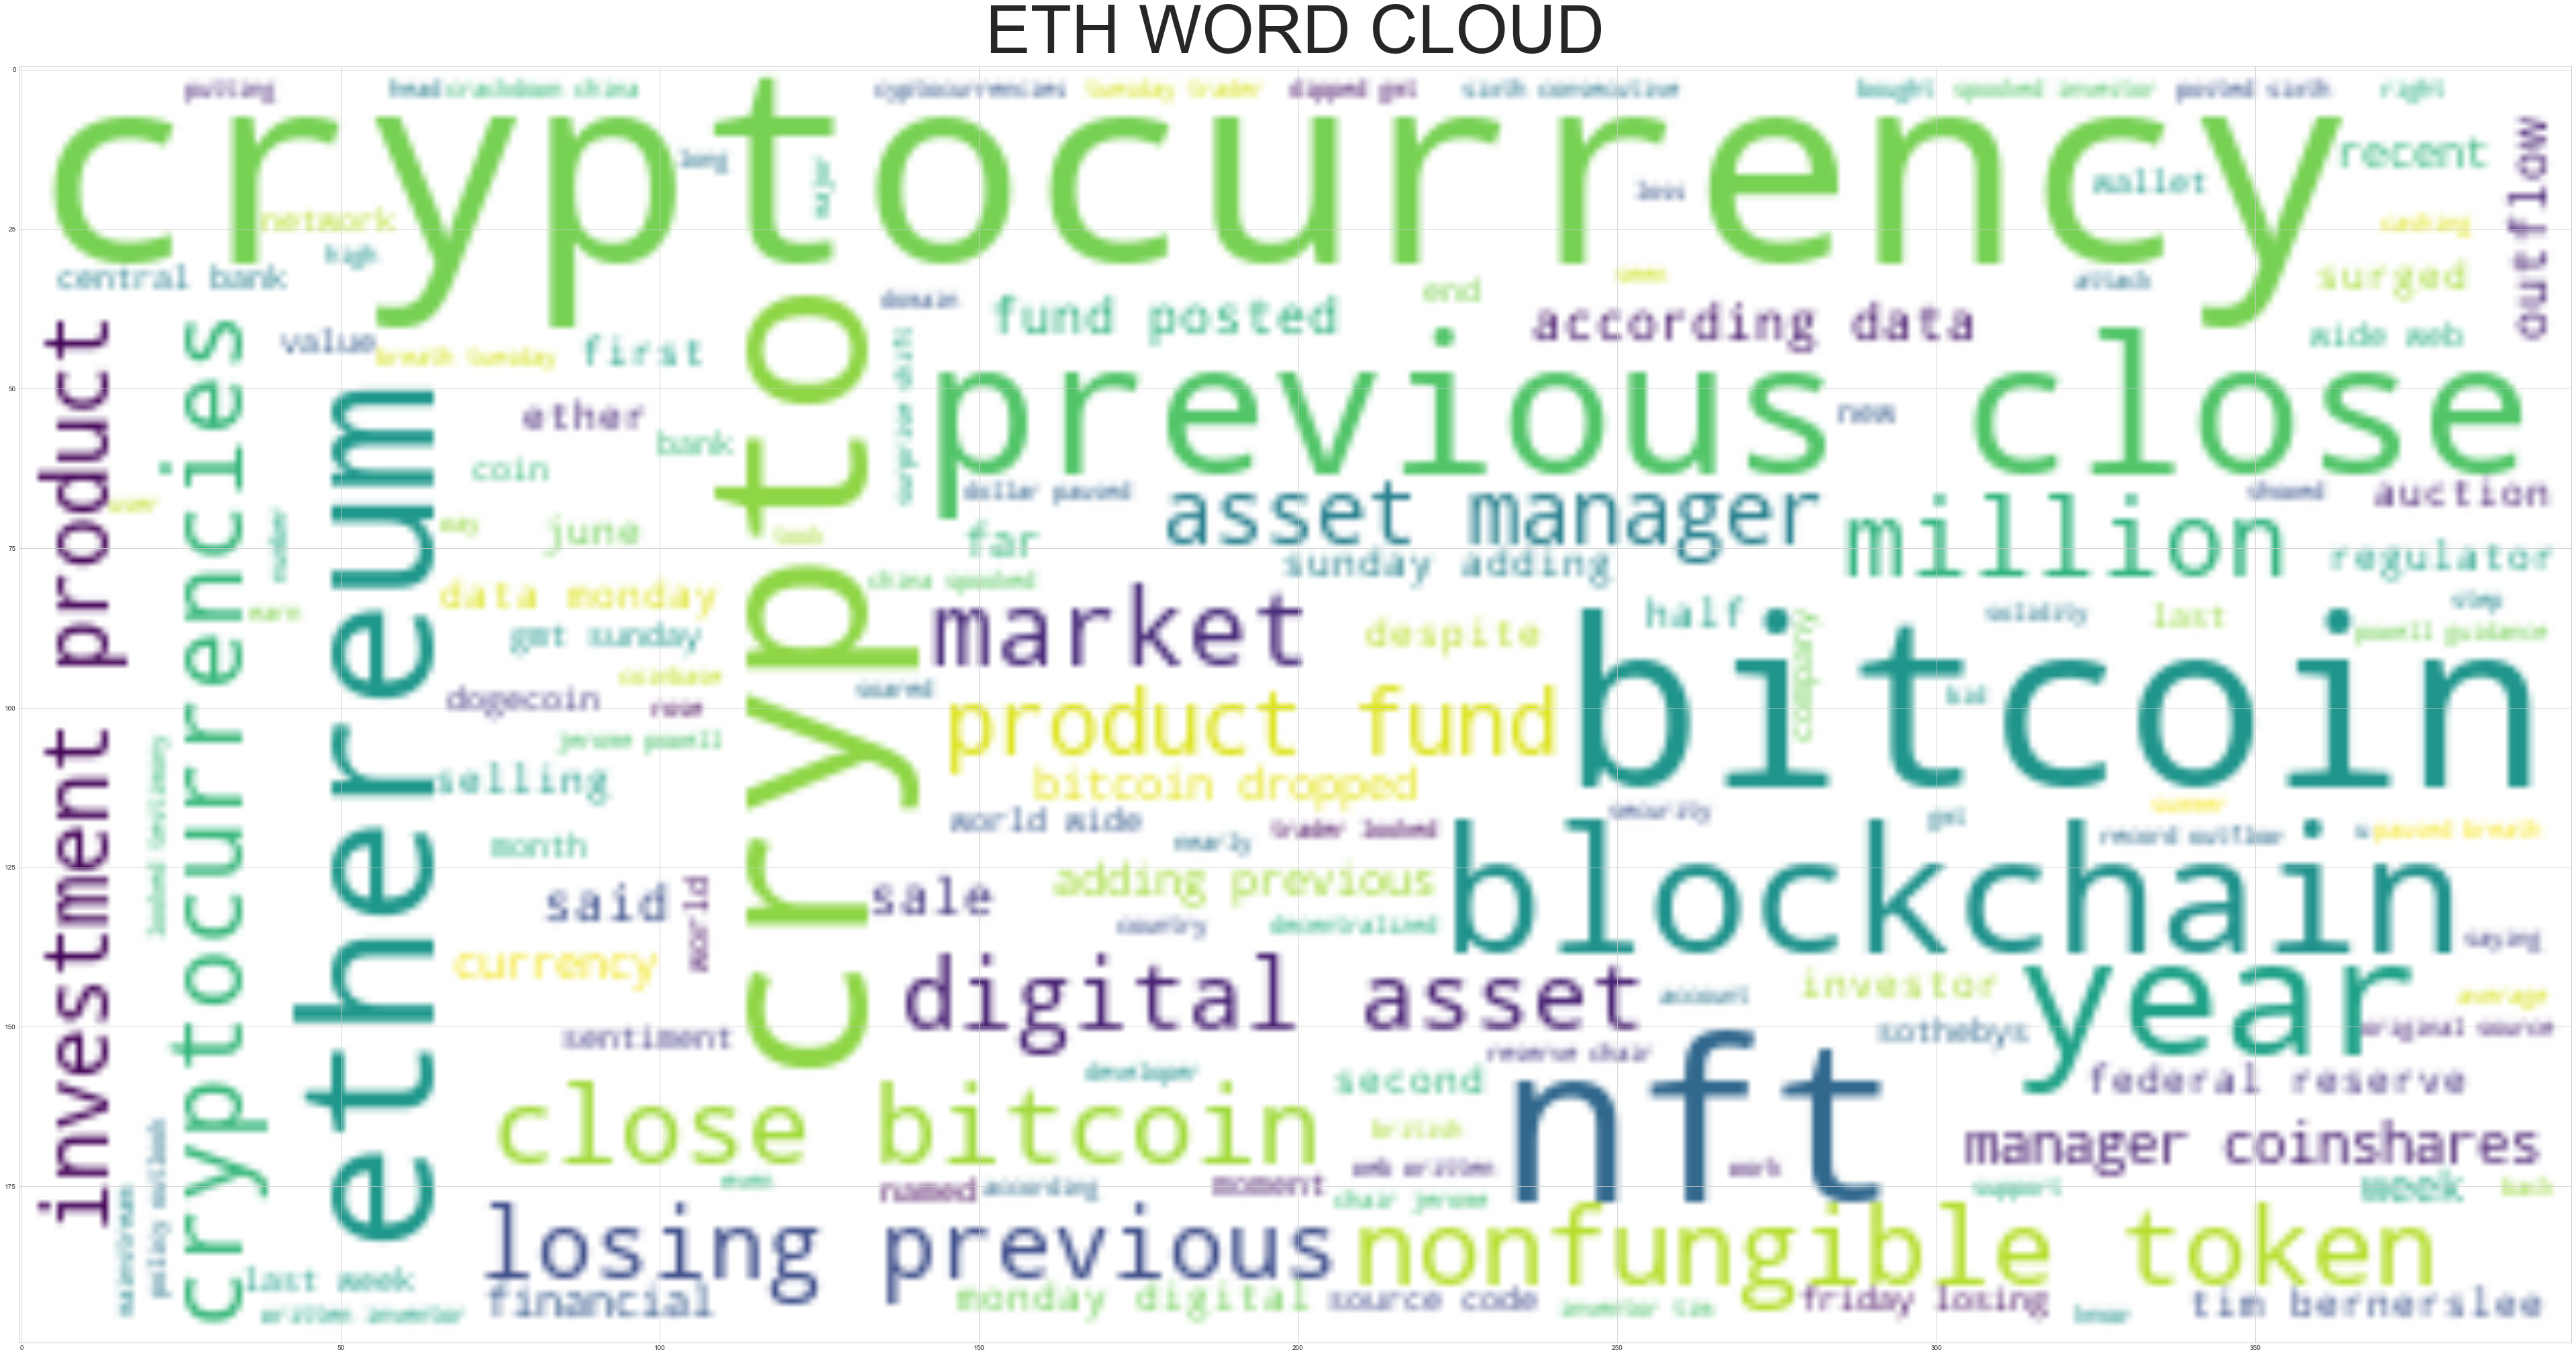

In [22]:
# Generate the Ethereum word cloud
wc = WordCloud(background_color="white", max_words=200)
wc.generate(corpus_eth)
f = plt.figure(figsize=(150,150))
f.add_subplot(1,2, 2)
plt.imshow(wc, interpolation='bilinear')
plt.title("ETH WORD CLOUD",fontsize=100)
plt.show()

---
## 3. Named Entity Recognition

In this section, you will build a named entity recognition model for both Bitcoin and Ethereum, then visualize the tags using SpaCy.

In [23]:
import spacy
from spacy import displacy

In [25]:
# Download the language model for SpaCy
# !python -m spacy download en_core_web_sm

In [24]:
# Load the spaCy model
nlp = spacy.load('en_core_web_sm')

---
### Bitcoin NER

In [25]:
# Concatenate all of the Bitcoin text together
concat_btc = btc_df['description'].str.cat(sep=', ')

In [26]:
# Run the NER processor on all of the text
doc = nlp(concat_btc)
doc.user_data["title"] = "BTC NER WORD CLOUD"

# Add a title to the document
# YOUR CODE HERE!

In [27]:
# Render the visualization

displacy.render(doc, style='ent')

In [28]:
# List all Entities
from pprint import pprint
pprint([(X.text, X.label_) for X in doc.ents])

[('Elon Musk', 'PERSON'),
 ('Tesla', 'PERSON'),
 ('the past few months', 'DATE'),
 ('first', 'ORDINAL'),
 ('Tesla', 'ORG'),
 ('$1.5 billion', 'MONEY'),
 ('Three days', 'DATE'),
 ('REvil', 'ORG'),
 ('as much as $70 million', 'MONEY'),
 ('Bitcoin', 'GPE'),
 ('more than 1 million', 'CARDINAL'),
 ('Bitcoin', 'PERSON'),
 ('El Salvador', 'GPE'),
 ('U.S.', 'GPE'),
 ('Finance', 'ORG'),
 ('Alejandro Zelaya', 'PERSON'),
 ('Wednesday', 'DATE'),
 ('Central American', 'NORP'),
 ('the World Bank', 'ORG'),
 ('El Salvador', 'GPE'),
 ('Nayib Bukele', 'PERSON'),
 ('El Salvador', 'GPE'),
 ('Nayib Bukele', 'PERSON'),
 ('El Salvador', 'GPE'),
 ('U.S.', 'GPE'),
 ('Finance', 'ORG'),
 ('Alejandro Zelaya', 'PERSON'),
 ('Wednesday', 'DATE'),
 ('Central American', 'NORP'),
 ('the World Bank', 'ORG'),
 ('Monday', 'DATE'),
 ('morning', 'TIME'),
 ('the weekend', 'DATE'),
 ('this week', 'DATE'),
 ('Bitcoin', 'PERSON'),
 ('Bitcoin', 'PERSON'),
 ('9.8%', 'PERCENT'),
 ('39,035.47', 'MONEY'),
 ('Sunday', 'DATE'),
 ('3,4

---

### Ethereum NER

In [29]:
# Concatenate all of the Ethereum text together
concat_eth = eth_df['description'].str.cat(sep=', ')
concat_eth

'TL;DR: The Cryptocurrency with Ethereum and Solidity Blockchain Developer Bundle is on sale for £21.25 as of June 17, saving you 97% on list price.\n\nIs everyone you know investing in cryptocurrency? The Cryptocurrency with Ethereum and Solidity Blockchain Dev…, It wasn\'t long ago that your average person had no clue what an NFT was. Nowadays, they\'re making headlines for selling for hundreds of thousands of bucks. Predictably, folks are learning about NFTs fast.\nAn NFT — or a non-fungible token — is a type of crypto…, Ethereum overtook bitcoin in the number of active addresses on its network on Friday, a sign that demand is faltering., Users are putting forward "stakes" of ether to gain the right to validate transactions on the ethereum 2.0 network and earn more coins., Users are putting forward "stakes" of ether to gain the right to validate transactions on the ethereum 2.0 network and earn more coins., Coinbase could potentially earn around $500 million a year in revenues from 

In [30]:
# Run the NER processor on all of the text
doc = nlp(concat_eth)
doc.user_data["title"] = "ETH NER WORD CLOUD"
# Add a title to the document
# YOUR CODE HERE!

In [31]:
# Render the visualization
displacy.render(doc, style='ent')

In [32]:
# List all Entities
from pprint import pprint
pprint([(X.text, X.label_) for X in doc.ents])

[('21.25', 'MONEY'),
 ('June 17', 'DATE'),
 ('97%', 'PERCENT'),
 ('Solidity Blockchain Dev', 'PERSON'),
 ('NFT', 'ORG'),
 ('hundreds of thousands', 'CARDINAL'),
 ('NFT', 'ORG'),
 ('Ethereum', 'ORG'),
 ('Friday', 'DATE'),
 ('2.0', 'CARDINAL'),
 ('2.0', 'CARDINAL'),
 ('Coinbase', 'NORP'),
 ('around $500 million', 'MONEY'),
 ('the end of 2025', 'DATE'),
 ('JPMorgan', 'ORG'),
 ('Tim Berners-Lee', 'PERSON'),
 ('NFT', 'ORG'),
 ("Sotheby's", 'ORG'),
 ('NFT', 'ORG'),
 ('NEW YORK', 'GPE'),
 ('June 16', 'DATE'),
 ('Reuters', 'ORG'),
 ('The World Bank', 'ORG'),
 ('Wednesday', 'DATE'),
 ('El Salvador’s', 'GPE'),
 ('El Salvador', 'GPE'),
 ('NFT', 'ORG'),
 ('as much as', 'CARDINAL'),
 ('90 percent', 'PERCENT'),
 ('recent weeks', 'DATE'),
 ('recent months', 'DATE'),
 ('Bitcoin', 'PERSON'),
 ('5.71%', 'PERCENT'),
 ('35,210', 'MONEY'),
 ('0600', 'CARDINAL'),
 ('GMT', 'ORG'),
 ('Saturday', 'DATE'),
 ('2,131.11', 'MONEY'),
 ('February 2018', 'DATE'),
 ('last week', 'DATE'),
 ('three years ago', 'DATE'),


---